<a href="https://colab.research.google.com/github/cam2149/AnalisisDatosI/blob/main/EntregableFinal_AnalisisMultivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img height="45px" src="https://drive.google.com/uc?id=1dusNXTL_M0CB5BJDB_GCvTKNCqYz10U6"align="left" hspace="10px" vspace="0px"></p>

<h1>Modelo para la predicción de categorías de trámites </h1>


---

# **Introducción**

Cuando se realiza un proceso de comprensión de los datos, es posible encontrar algunos problemas potenciales que deben abordarse antes de la estapa de modelado.
En este entregable, se manejaran algunos problemas frecuentes de calidad de datos y preparar el conjunto de datos correctamente (instancias o atributos duplicados o irrelevantes, valores incorrectos, valores perdidos).
<br>Se realizará exploración de los datos a través de estadistica descriptiva, analisis de bivariado para conocer los tipos de correlaciones entre estas variables.
<br>El archivo CSV proporcionado contiene una serie de datos del sistema de gestión de transacciones de compra de Serie para exámenes medicos y cursos de cunducción, estos involucran identificación de usuarios, transacciones de compra y otros datos personales.


##El problema
Una entidad dedicada a la venta de Pines y agendamiento de exámenes médicos y cursos de conducción en los CRCs y CEAs del país, el flujo de compra de Pines está optimizado para realizar la menor cantidad de interacciones posibles para llevar a cabo la compra del Pines, aun así muchos usuarios recomiendan que sistema debe ser un poco más intuitivo frente al trámite que desea realizar el ciudadano, lo anterior según sus características básicas como edad y/o si cuenta con licencia actualmente, con la información básica tomada se pueda sugerir el trámite que el usuario desea realizar y eliminar la interacciones y pasar al costo sugerido según las diferentes posibilidades que se le pueden presentar al usuario y así diminuir al menos de tres a cuatro interacciones y tiempo del trámite de compra de Pines.

##Justificación
Para predecir con precisión el tipo de categoría de licencia que los usuarios que desean realizar con su licencia de conducción, es fundamental aprovechar los datos históricos con los que cuenta la compañía. Los sistemas de predicción, basados en algoritmos de Machine Learning, permiten construir estimaciones a partir de los comportamientos de los usuarios. Al tener suficientes datos históricos, se pueden capturar patrones y tendencias que ayudan a anticipar las preferencias de los usuarios, como Amazon, utilizan datos históricos de compras y navegación para recomendar productos a los usuarios, del mismo modo en la entidad, se puede optimizar las sugerencias a presentar al usuario acerca del trámite a realizar según sus datos básicos y geolocalización.

##Pregunta SMART
¿Es posible utilizar los datos históricos de los usuarios para predecir con precisión el tipo de trámite o categoría que desean realizar los usuarios y alcanzar la disminución el tiempo del trámite?

In [1]:
# Importar librería pandas y numpy
# Pandas es una librería de Python que proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento
import pandas as pd
# NumPy es una librería de Python que proporciona estructuras de datos y operaciones matemáticas de alto rendimiento.
import numpy as np
#Matplotlib.pyplot es una librería de Python que proporciona herramientas de visualización y gráficos de alta calidad.
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
#Seaborn es una librería de Python que proporciona herramientas de visualización y análisis de datos de alta calidad.
import seaborn as sns

#métricas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tqdm.auto import tqdm
import time

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

#sns.set(color_codes=True) es un método de la librería Seaborn que establece los códigos de color predeterminados para los gráficos y diagramas. Cuando se establece color_codes=True, Seaborn utiliza una paleta de colores predefinida y asigna un código de color a cada categoría o variable en los gráficos y diagramas.
sns.set(color_codes=True)
#Cuando se establece rc={'figure.figsize':(10,6)}, Seaborn crea figuras con un tamaño de 10 unidades de ancho y 6 unidades de alto.
sns.set(rc={'figure.figsize':(10,6)})


In [2]:
#**Importar los datos**
#Para iniciar, importe la librería pandas y lea el archivo CSV que contiene el *dataset*, utilizando el método ```read_csv()```y
#la dirección URL https://raw.githubusercontent.com/cam2149/eda_couse/main/data/data.csv que almacena los datos.

filename = "https://raw.githubusercontent.com/cam2149/eda_couse/main/data/data.csv"
# Lista de encabezados o nombres de los atributos
headers = ["Id","IdTipoIdentificacion","NumeroIdentificacion","Email","Nombres","Apellidos","FechaNacimiento","IdGenero","NumeroTelefono","ValorTransaccion","ValorDescuento","ValorImpuesto","ValorAdmon","Serie","IdTramite","Tramite","Clasificacion","Categoria","SegundaCategoria","IdEstado","Estado","FechaHoraOperacion","IdOrigen","Core"]

tramitesdf = pd.read_csv(filename, names= headers, encoding='latin-1', header=1)

Utilice el método ```head()```para visualizar las primeras cinco filas del *data frame*.

In [3]:
# Para ver cómo luce el dataset tramitesdf, utilizamos el método head().
tramitesdf.head()

,Id,IdTipoIdentificacion,NumeroIdentificacion,Email,Nombres,Apellidos,FechaNacimiento,IdGenero,NumeroTelefono,ValorTransaccion,...,IdTramite,Tramite,Clasificacion,Categoria,SegundaCategoria,IdEstado,Estado,FechaHoraOperacion,IdOrigen,Core
0,319271,1,79658128,gramos@yopmail.com,Martina Harletty,Ramos Gutierrez,'1990-01-17',2,3.142351e+09,101979,...,1,PrimeraVez,317014,B1,NaN,6,Referencia Vencida,'2023-11-18 00:55:01.417',2,Cocacola
1,319272,1,79658128,gramos@yopmail.com,Martina Harletty,Ramos Gutierrez,'1990-01-17',2,3.142351e+09,101979,...,1,PrimeraVez,317015,B1,NaN,2,Activo,'2021-09-24 11:56:13.063',2,Cocacola
2,319273,2,S545454,clientecrc@yopmail.com,Martina,Moreno,'1989-09-09',1,3.104444e+09,149232,...,1,PrimeraVez,317016,B1,NaN,2,Activo,'2021-09-24 15:06:10.310',4,Dea
3,319275,5,EE989898,clientecrc@yopmail.com,Andrea,Moreno,'1988-08-08',2,3.104444e+09,149132,...,1,PrimeraVez,317017,A2,NaN,4,Usado,'2021-09-27 09:34:17.543',4,Dea
4,319302,5,A283848,clientecrc@yopmail.com,Martina,Argos,'1990-10-10',1,3.104444e+09,149232,...,1,PrimeraVez,317018,B1,NaN,2,Activo,'2021-09-27 16:02:11.050',4,Dea


In [4]:
tramitesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    4431 non-null   int64  
 1   IdTipoIdentificacion  4431 non-null   int64  
 2   NumeroIdentificacion  4431 non-null   object 
 3   Email                 4414 non-null   object 
 4   Nombres               4431 non-null   object 
 5   Apellidos             4431 non-null   object 
 6   FechaNacimiento       4431 non-null   object 
 7   IdGenero              4431 non-null   int64  
 8   NumeroTelefono        4414 non-null   float64
 9   ValorTransaccion      4431 non-null   int64  
 10  ValorDescuento        4431 non-null   int64  
 11  ValorImpuesto         4431 non-null   int64  
 12  ValorAdmon            4431 non-null   int64  
 13  Serie                 4431 non-null   int64  
 14  IdTramite             4431 non-null   int64  
 15  Tramite              

In [5]:
# Para ver los tipos datos que tiene dataset, utilizamos el método df.dtypes.
tramitesdf.dtypes

,0
Id,int64
IdTipoIdentificacion,int64
NumeroIdentificacion,object
Email,object
Nombres,object
Apellidos,object
FechaNacimiento,object
IdGenero,int64
NumeroTelefono,float64
ValorTransaccion,int64



## Limpieza de Datos
## Identificar valores perdidos

En nuestro conjunto de datos, los datos perdidos están marcados con un signo de interrogación "?". Para que pandas reconozca la existencia de valores perdidos dentro del *data frame*, es necesarios identificarlos y realizar el replace correspondiente, existen diferentes estrategias para realizar esta transformación.
<br><br>
Identificaremos dentro del variable **precio** los datos en **?** Utilizaremos la función ```.replace(A, B, inplace = True)```para reemplazar A por B. Para poder utilizar esta función, debe importar la librería ```numpy```.


In [6]:
#Establecer el valor faltante como media del valorTransaccion y convertir el tipo de datos a entero
valorTransaccion = tramitesdf['ValorTransaccion'].loc[tramitesdf['ValorTransaccion'] != '?']
vtmean = valorTransaccion.astype(str).astype(int).mean()
tramitesdf['ValorTransaccion'] = tramitesdf['ValorTransaccion'].replace('?',vtmean).astype(int)
tramitesdf['ValorTransaccion'].head()

,ValorTransaccion
0,101979
1,101979
2,149232
3,149132
4,149232


In [7]:
# KNNImputer es una herramienta de aprendizaje automático utilizada para imputar, o inferir, valores faltantes en un conjunto de datos. Se basa en el algoritmo k-vecinos más cercanos, que identifica los k puntos de datos más cercanos a un punto con valores faltantes y utiliza sus valores como predicción para el punto faltante. KNNImputer puede ser una alternativa efectiva a otras técnicas de imputación, como la media o la moda, especialmente cuando los datos faltantes están relacionados con las características de los datos. Sin embargo, también tiene limitaciones, como la necesidad de especificar el parámetro k y la posibilidad de ser afectado por valores atípicos en el conjunto de datos.

from sklearn.impute import KNNImputer

# Construimos el modelo
imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Entrenamos el modelo
imputer.fit(tramitesdf[["ValorTransaccion"]])

#Reemplazamos los valores nulos
tramitesdf["ValorTransaccion"] = imputer.transform(tramitesdf[["ValorTransaccion"]]).ravel()


* ***Convertir "?" a NaN***

En nuestro conjunto de datos, los datos perdidos están marcados con un signo de interrogación "?". Otra estrategia es usar el marcador predeterminado que utiliza Python es **NaN (Not a Number)**.
<br><br>
Utilizaremos la función ```.replace(A, B, inplace = True)```para reemplazar A por B. Para poder utilizar esta función, debe importar la librería ```numpy```.

In [8]:
import numpy as np

# Reemplazar "?" por NaN
tramitesdf.replace("?", np.nan, inplace = True)
tramitesdf.head(5)

,Id,IdTipoIdentificacion,NumeroIdentificacion,Email,Nombres,Apellidos,FechaNacimiento,IdGenero,NumeroTelefono,ValorTransaccion,...,IdTramite,Tramite,Clasificacion,Categoria,SegundaCategoria,IdEstado,Estado,FechaHoraOperacion,IdOrigen,Core
0,319271,1,79658128,gramos@yopmail.com,Martina Harletty,Ramos Gutierrez,'1990-01-17',2,3.142351e+09,101979.0,...,1,PrimeraVez,317014,B1,NaN,6,Referencia Vencida,'2023-11-18 00:55:01.417',2,Cocacola
1,319272,1,79658128,gramos@yopmail.com,Martina Harletty,Ramos Gutierrez,'1990-01-17',2,3.142351e+09,101979.0,...,1,PrimeraVez,317015,B1,NaN,2,Activo,'2021-09-24 11:56:13.063',2,Cocacola
2,319273,2,S545454,clientecrc@yopmail.com,Martina,Moreno,'1989-09-09',1,3.104444e+09,149232.0,...,1,PrimeraVez,317016,B1,NaN,2,Activo,'2021-09-24 15:06:10.310',4,Dea
3,319275,5,EE989898,clientecrc@yopmail.com,Andrea,Moreno,'1988-08-08',2,3.104444e+09,149132.0,...,1,PrimeraVez,317017,A2,NaN,4,Usado,'2021-09-27 09:34:17.543',4,Dea
4,319302,5,A283848,clientecrc@yopmail.com,Martina,Argos,'1990-10-10',1,3.104444e+09,149232.0,...,1,PrimeraVez,317018,B1,NaN,2,Activo,'2021-09-27 16:02:11.050',4,Dea


* ***Evaluar los datos perdidos***
Una vez convertidos los datos perdidos a los valores predeterminados de Python, pasamos a utilizar funciones integradas de Python que nos permiten identificar estos datos. Hay tres métodos para detectar valores perdidos: ```.isnull()```, ```.notnull()``` y ```.isna()```. Sus salidas son un valor booleano que indica si el valor que se pasa en los argumentos es un dato perdido.

In [9]:
missing_data = tramitesdf.isnull()
missing_data.head(5)

,Id,IdTipoIdentificacion,NumeroIdentificacion,Email,Nombres,Apellidos,FechaNacimiento,IdGenero,NumeroTelefono,ValorTransaccion,...,IdTramite,Tramite,Clasificacion,Categoria,SegundaCategoria,IdEstado,Estado,FechaHoraOperacion,IdOrigen,Core
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


En el ejemplo anterior, "True" significa valor perdido, mientras que "False" significa valor no perdido.

* ***Contar los valores perdidos de cada columna***

Utilizando un bucle ```for``` podemos calcular el número de valores perdidos de cada columna. Como se mencionó anteriormente, "True" representa un valor faltante, mientras que "False" significa que el valor sí está presente en el conjunto de datos. En el cuerpo del bucle ```for``` que ejecutará a continuación, el método ```.value_counts()``` cuenta el número de valores "True".

In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Id
Id
False    4431
Name: count, dtype: int64

IdTipoIdentificacion
IdTipoIdentificacion
False    4431
Name: count, dtype: int64

NumeroIdentificacion
NumeroIdentificacion
False    4431
Name: count, dtype: int64

Email
Email
False    4414
True       17
Name: count, dtype: int64

Nombres
Nombres
False    4431
Name: count, dtype: int64

Apellidos
Apellidos
False    4431
Name: count, dtype: int64

FechaNacimiento
FechaNacimiento
False    4431
Name: count, dtype: int64

IdGenero
IdGenero
False    4431
Name: count, dtype: int64

NumeroTelefono
NumeroTelefono
False    4414
True       17
Name: count, dtype: int64

ValorTransaccion
ValorTransaccion
False    4431
Name: count, dtype: int64

ValorDescuento
ValorDescuento
False    4431
Name: count, dtype: int64

ValorImpuesto
ValorImpuesto
False    4431
Name: count, dtype: int64

ValorAdmon
ValorAdmon
False    4431
Name: count, dtype: int64

Serie
Serie
False    4431
Name: count, dtype: int64

IdTramite
IdTramite
False    4431
Name: count, dtype: 

Según el resultado anterior, cada columna tiene 4431 filas de datos, y existen filas que contienen valores perdidos:

1.   "Email": 17 valores perdidos
2.   "NumeroTelefono" : 17 valores perdidos
3.   "SegundaCategoria": 264 valores perdidos


Para contar los valores perdidos que hay en cada atributo, también puede utilizar la función ```.sum()``` después de cualquiera de las funciones para detectar valores perdidos en el *data frame* (```.isnull()```, ```.notnull()```, y ```.isna()```). Esta función sumará todos los valores *True* y proporcionará un resumen para cada atributo, además no tendrá necesidad de utilizar un bucle.
<br><br>
**Vea el resumen de los valores perdidos para los atributos del dataset.** Ingrese sus líneas de código a continuación:

In [11]:
#Escriba su código a continuación y presione Shift + Enter para ejecutar
tramitesdf.isna().sum()


,0
Id,0
IdTipoIdentificacion,0
NumeroIdentificacion,0
Email,17
Nombres,0
Apellidos,0
FechaNacimiento,0
IdGenero,0
NumeroTelefono,17
ValorTransaccion,0


In [12]:
tramitesdf.isnull().sum()

,0
Id,0
IdTipoIdentificacion,0
NumeroIdentificacion,0
Email,17
Nombres,0
Apellidos,0
FechaNacimiento,0
IdGenero,0
NumeroTelefono,17
ValorTransaccion,0


## Lidiar con valores perdidos

Cuando tenemos un *dataset* con valores perdidos, podemos tomar las siguientes decisiones:

* Eliminar datos
 *   Eliminar toda la fila
 *   Eliminar toda la columna

* Reemplazar datos
 *   Reemplazar por la media (o promedio)
 *   Reemplazar por la frecuencia
 *   Reemplazar en función de otras funciones


Tenga en cuenta que una columna entera se puede descartar solo si la mayoría de sus valores están vacíos. En nuestro conjunto de datos, ninguna de las columnas está lo suficientemente vacía como para eliminarla por completo, así que reemplazaremos los valores perdidos. En este punto, tenemos cierta libertad para elegir el método de reemplazo, sin embargo, algunos métodos pueden parecer más razonables que otros. Aquí aplicaremos cada método a diferentes columnas:
<br><br>




* ***ELIMINAR COLUMNAS NO NECESARIAS:*** <br>
"Email", "NumeroTelefono","Nombres","Apellidos","IdCotizadorPasarelaPtesa","IdCore"




In [13]:
# Elimina la columnas
tramitesdf = tramitesdf.drop(["Email","NumeroTelefono","Nombres","Apellidos","Clasificacion","IdTipoIdentificacion","IdOrigen"], axis=1)


In [14]:
tramitesdf.describe()

,Id,IdGenero,ValorTransaccion,ValorDescuento,ValorImpuesto,ValorAdmon,Serie,IdTramite,IdEstado
count,4431.000000,4431.000000,4.431000e+03,4.431000e+03,4.431000e+03,4.431000e+03,4.431000e+03,4431.000000,4431.000000
mean,357537.391334,1.206951,4.624294e+05,1.883097e+04,6.115531e+04,2.017315e+04,9.119530e+14,1.189573,4.269916
std,26007.932269,0.405166,1.351433e+06,2.690946e+05,2.697210e+05,2.690154e+05,5.806334e+13,0.541872,1.796861
min,307311.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.020020e+14,1.000000,1.000000
25%,339751.500000,1.000000,1.365070e+05,6.000000e+03,2.891700e+04,6.962000e+03,8.680010e+14,1.000000,2.000000
50%,372032.000000,1.000000,1.938040e+05,7.200000e+03,3.644900e+04,8.199000e+03,9.204009e+14,1.000000,4.000000
75%,373182.500000,1.000000,4.486155e+05,7.800000e+03,8.270500e+04,1.012700e+04,9.606011e+14,1.000000,6.000000
max,384650.000000,2.000000,4.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,9.998004e+14,3.000000,6.000000



* ***REEMPLAZAR Categoria por el valor de SegundaCategoria:*** <br>
"Categoria", "SegundaCategoria".

Para empezar, necesitamos crear un transformador para identificar los datos de SegundaCategoria que no son NaN y en este registro reemplazar el valor de Categoria con el de SegundaCategoria. En el siguiente ejemplo hacemos el transformador correspondiente:

In [15]:
# Crear el transformador
def transformador(row):
    if pd.notna(row["SegundaCategoria"]):
        row["Categoria"] = row["SegundaCategoria"]
        row = row.drop("SegundaCategoria")
    return row

# Aplicar el transformador al dataframe headers
tramitesdf = tramitesdf.apply(transformador, axis=1)

# Mostrar el dataframe headers después de aplicar el transformador
print(tramitesdf)

     Categoria          Core              Estado         FechaHoraOperacion  \
0           B1      Cocacola  Referencia Vencida  '2023-11-18 00:55:01.417'   
1           B1      Cocacola              Activo  '2021-09-24 11:56:13.063'   
2           B1           Dea              Activo  '2021-09-24 15:06:10.310'   
3           A2           Dea               Usado  '2021-09-27 09:34:17.543'   
4           B1           Dea              Activo  '2021-09-27 16:02:11.050'   
...        ...           ...                 ...                        ...   
4426        B1           Dea              Activo  '2022-12-27 12:04:53.083'   
4427        A2           Dea              Activo  '2022-12-27 12:04:35.133'   
4428        A2      Cocacola  Referencia Vencida  '2023-11-18 00:55:01.417'   
4429        A2  PuntoPagoCrc  Referencia Vencida  '2023-11-18 00:55:01.417'   
4430        A2      Cocacola  Referencia Vencida  '2023-11-18 00:55:01.417'   

     FechaNacimiento      Id  IdEstado  IdGenero  I

Podemos verificar los cambios en el *data frame*:

In [16]:
#Eliminamos la columa SegundaCategoria
tramitesdf = tramitesdf.drop("SegundaCategoria", axis=1)

* ***ELIMINAR TODA LA FILA:***<br>
"Categoria". La Categoria es lo que queremos predecir. Cualquier instancia sin Categoria no puede ser utilizada porque no será util para aprender de ella.
De igual forma con el Serie y el Genero

El paquete pandas proporciona un método que podemos usar para eliminar fácilmente los valores faltantes: ```.dropna()```. Este método devuelve un nuevo DataFrame sin las filas que tienen valores perdidos. De forma predeterminada, evalúa los valores perdidos de todas las columnas, pero Usted puede especificar una lista de columnas para que centre su búsqueda en esos atributos:

```df.dropna (subset = ['columna'])```
<br><br>
Este método devuelve un nuevo *DataFrame* sin valores perdidos para las columnas especificadas. Si desea reemplazar el conjunto de datos original directamente, puede usar el parámetro ```inplace = True```:

```df.dropna(subset=['columna'], inplace=True)```
<br><br>
Entonces, eliminemos todas las instancias que no tienen datos en el atributo "Serie", utilizando el método ```.dropna()```:

In [17]:
# Elimine la fila/instancia completa que tiene valor NaN en la columna "precio"
tramitesdf.dropna(subset=["Serie"], axis=0, inplace=True)

# Restablezca el índice del dataframe porque se eliminaron dos filas
tramitesdf.reset_index(drop=True, inplace=True)

# Eliminar filas donde Categoria es "0"
tramitesdf = tramitesdf[tramitesdf['Categoria'] != "0"]

In [18]:
#Este transformador eliminará todas las filas duplicadas de un conjunto de datos, manteniendo solo una copia de cada fila, según las columnas especificadas (Serie y NumeroIdentificacion). De esta manera, se garantiza que no haya filas repetidas con los mismos valores en esas columnas, lo que puede ser útil para mejorar la calidad de los datos y reducir el ruido en el análisis.
#Define un transformador para eliminar filas duplicadas basadas en las columnas Serie y NumeroIdentificacion

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

class RemoveDuplicates(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        dup_cols = ['Serie']
        X_deduped = X.drop_duplicates(subset=dup_cols)
        return X_deduped

# Define a transformer to remove rows where IdPtesaEstado is equal to 6
class RemoveEstado6(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_filtered = X[X['IdEstado'] != 6]
        return X_filtered

# Create a pipeline to apply the transformers in sequence
pipeline = Pipeline([
    ('remove_duplicates', RemoveDuplicates()),
    ('remove_estado6', RemoveEstado6())
])

# Apply the pipeline to the tramitesdf dataframe
tramitesdf = pipeline.fit_transform(tramitesdf)

In [19]:
# Transformador para asignar un código a cada categoría
#Este transformador asigna un código numérico único a cada categoría en una columna de un conjunto de datos. De esta manera, se puede convertir una columna categórica en una columna numérica, lo que puede ser útil para realizar análisis y modelado estadístico. Además, el uso de códigos numéricos puede ayudar a reducir la dimensionalidad de los datos y mejorar el rendimiento de los algoritmos de aprendizaje automático.
#Es importante asegurarse de que las categorías sean consistentes y no haya errores de ortografía o formato en la columna antes de aplicar el transformador, ya que esto podría resultar en la asignación de códigos incorrectos.

class AssignCategoryCode(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.category_codes = {category: i for i, category in enumerate(sorted(set(X['Categoria'])))}
        return self

    def transform(self, X, y=None):
        X['CodigoCategoria'] = X['Categoria'].map(self.category_codes)
        return X

# Create a pipeline to apply the transformers in sequence
pipeline = Pipeline([
    ('assign_category_code', AssignCategoryCode())
])

# Apply the pipeline to the tramitesdf dataframe
tramitesdf = pipeline.fit_transform(tramitesdf)

In [20]:
# Convertir la columna FechaNacimiento y FechaHoraOperacion a formato datetime
# Esta conversión cambia el formato de la columna FechaNacimiento y FechaHoraOperacion de una cadena de texto a un objeto datetime en Python. Esto puede ser útil para realizar análisis y modelado estadístico que requieran operaciones de fecha y hora, como calcular la edad o determinar la distribución de edades en un conjunto de datos.
tramitesdf['FechaNacimiento'] = pd.to_datetime(tramitesdf['FechaNacimiento'])

# Convertir la columna FechaHoraOperacion a formato datetime
tramitesdf['FechaHoraOperacion'] = pd.to_datetime(tramitesdf['FechaHoraOperacion'])


print(tramitesdf)

     Categoria      Core  Estado      FechaHoraOperacion FechaNacimiento  \
1           B1  Cocacola  Activo 2021-09-24 11:56:13.063      1990-01-17   
2           B1       Dea  Activo 2021-09-24 15:06:10.310      1989-09-09   
3           A2       Dea   Usado 2021-09-27 09:34:17.543      1988-08-08   
4           B1       Dea  Activo 2021-09-27 16:02:11.050      1990-10-10   
6           B1       Dea  Activo 2021-09-27 16:41:13.970      2000-10-10   
...        ...       ...     ...                     ...             ...   
4385        B1     Pepsi  Activo 2022-12-21 11:40:20.353      2000-12-12   
4422        A1     Pepsi  Activo 2022-12-22 17:00:56.357      2000-12-12   
4425        C1       Dea  Activo 2022-12-27 12:05:05.307      1991-01-26   
4426        B1       Dea  Activo 2022-12-27 12:04:53.083      1991-01-26   
4427        A2       Dea  Activo 2022-12-27 12:04:35.133      1991-01-26   

          Id  IdEstado  IdGenero  IdTramite NumeroIdentificacion  \
1     319272       

In [21]:

# Transformador para eliminar filas con más de 3 caracteres idénticos consecutivos en NumeroIdentificacion

class RemoveConsecutiveIdenticalChars(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        pattern = r'(.)\1\1+'
        X_filtered = X[~X['NumeroIdentificacion'].str.contains(pattern, regex=True)]
        return X_filtered

# Create a pipeline to apply the transformers in sequence
pipeline = Pipeline([
    ('remove_consecutive_chars', RemoveConsecutiveIdenticalChars())
])

# Apply the pipeline to the tramitesdf dataframe
tramitesdf = pipeline.fit_transform(tramitesdf)

<ipython-input-21-e4b84730e739>:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  X_filtered = X[~X['NumeroIdentificacion'].str.contains(pattern, regex=True)]


In [22]:
from datetime import datetime

# Convertir la columna FechaNacimiento a formato datetime
tramitesdf['FechaNacimiento'] = pd.to_datetime(tramitesdf['FechaNacimiento'])

# Función para calcular la edad
def calcular_edad(fecha_nacimiento):
    hoy = datetime.today()
    edad = hoy - fecha_nacimiento
    años = edad.days // 365
    return años

# Aplicar la función al DataFrame
tramitesdf['Edad'] = tramitesdf['FechaNacimiento'].apply(calcular_edad)

print(tramitesdf)

     Categoria      Core   Estado      FechaHoraOperacion FechaNacimiento  \
1           B1  Cocacola   Activo 2021-09-24 11:56:13.063      1990-01-17   
2           B1       Dea   Activo 2021-09-24 15:06:10.310      1989-09-09   
3           A2       Dea    Usado 2021-09-27 09:34:17.543      1988-08-08   
4           B1       Dea   Activo 2021-09-27 16:02:11.050      1990-10-10   
6           B1       Dea   Activo 2021-09-27 16:41:13.970      2000-10-10   
...        ...       ...      ...                     ...             ...   
4384        A1     Pepsi  Anulado 2022-12-20 09:05:25.917      2000-12-12   
4385        B1     Pepsi   Activo 2022-12-21 11:40:20.353      2000-12-12   
4422        A1     Pepsi   Activo 2022-12-22 17:00:56.357      2000-12-12   
4425        C1       Dea   Activo 2022-12-27 12:05:05.307      1991-01-26   
4426        B1       Dea   Activo 2022-12-27 12:04:53.083      1991-01-26   

          Id  IdEstado  IdGenero  IdTramite NumeroIdentificacion  \
1     3

<ipython-input-22-9a8b39195197>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tramitesdf['FechaNacimiento'] = pd.to_datetime(tramitesdf['FechaNacimiento'])
<ipython-input-22-9a8b39195197>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tramitesdf['Edad'] = tramitesdf['FechaNacimiento'].apply(calcular_edad)


**Muy bien!** Ahora, tenemos el *dataset* sin valores perdidos.

## Corregir formato de datos

El último paso en la limpieza de datos es verificar y asegurarse de que todos los datos estén en el formato correcto (*int*, *float*, *text* u otro). En pandas utilizamos los métodos:
```.dtype()``` para ver los tipos de datos, y ```.astype()``` para cambiar tipos de datos.
<br><br>
Veamos los tipos de datos para cada columna:

In [23]:
tramitesdf.dtypes

,0
Categoria,object
Core,object
Estado,object
FechaHoraOperacion,datetime64[ns]
FechaNacimiento,datetime64[ns]
Id,int64
IdEstado,int64
IdGenero,int64
IdTramite,int64
NumeroIdentificacion,object


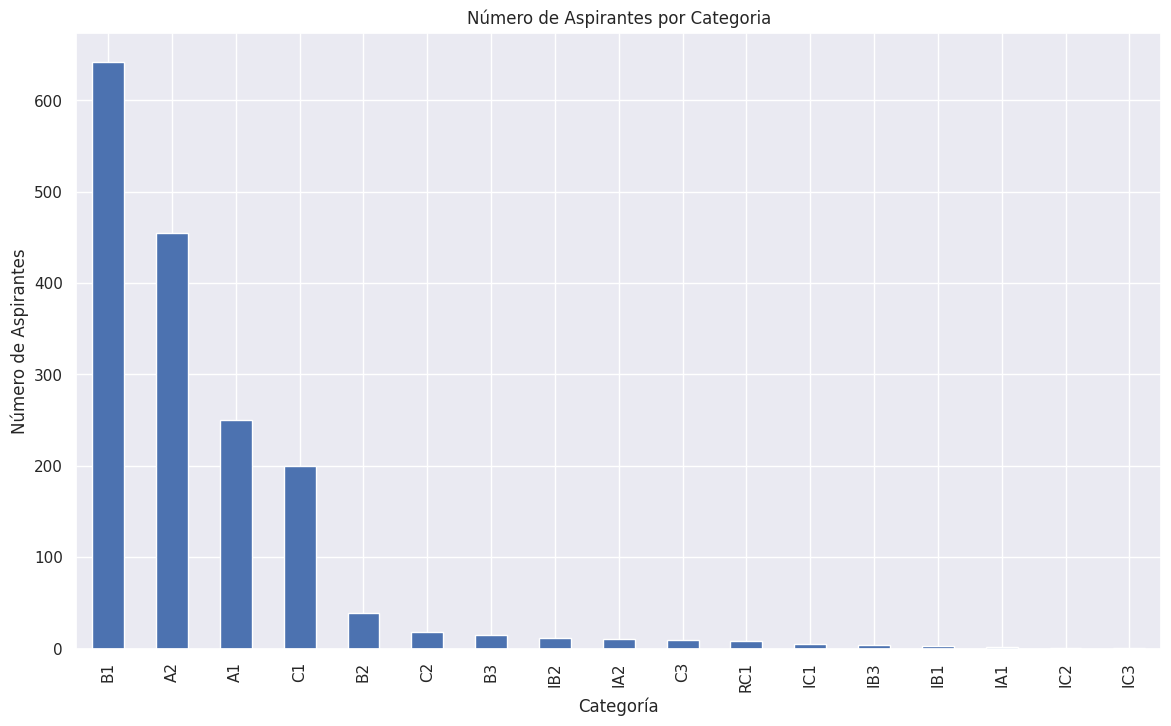

In [24]:
import matplotlib.pyplot as plt

tramitesdf.Categoria.value_counts().nlargest(30).plot(kind='bar', figsize=(14,8))
plt.title("Número de Aspirantes por Categoria")
plt.ylabel('Número de Aspirantes')
plt.xlabel('Categoría');

In [25]:
traccion_count = tramitesdf["IdGenero"].value_counts()
print(traccion_count)

IdGenero
1    1282
2     393
Name: count, dtype: int64


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = (10, 6)

Text(0, 0.5, 'Edad')

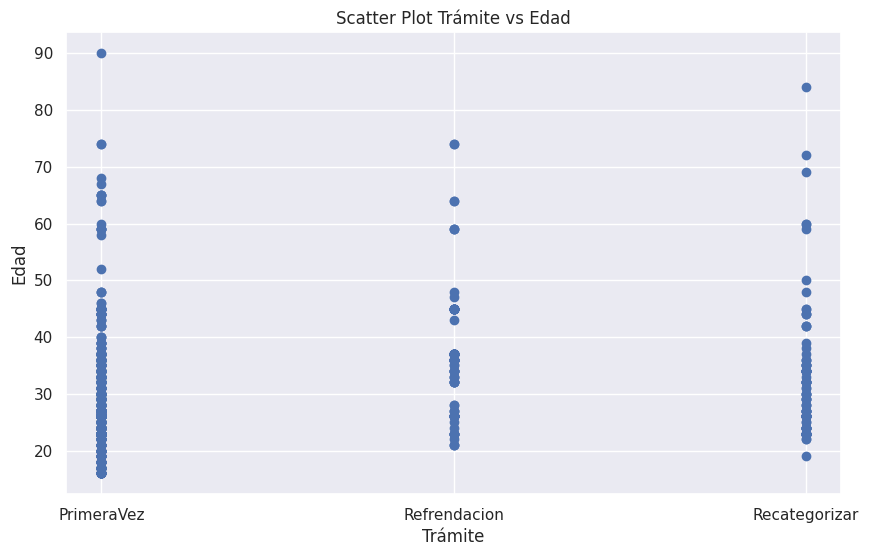

In [27]:
# Grafico de la relación entre “Tramite” y Edad
plt.scatter(tramitesdf["Tramite"], tramitesdf["Edad"])
plt.title("Scatter Plot Trámite vs Edad")
plt.xlabel("Trámite")
plt.ylabel("Edad")

<Axes: xlabel='Tramite', ylabel='Edad'>

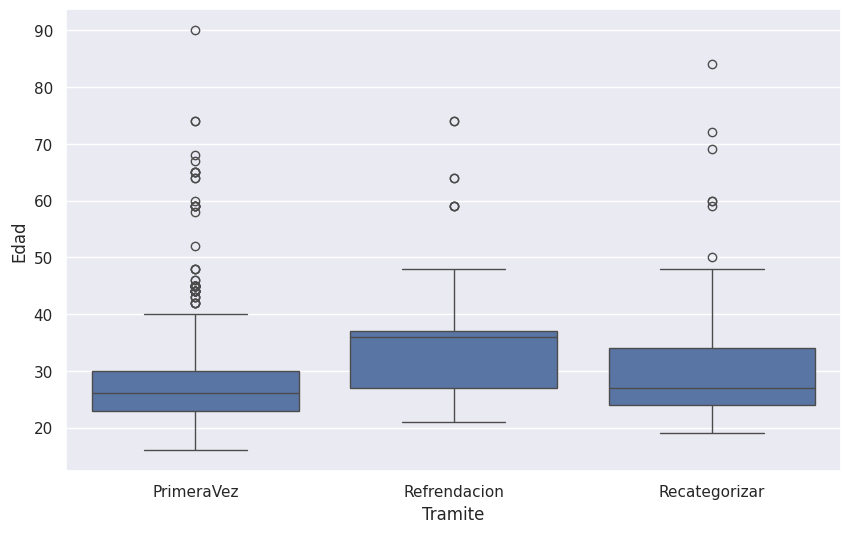

In [28]:
#boxplot to visualize the distribution of "Tramite" with types of "Categoria"
sns.boxplot(x="Tramite", y="Edad",data=tramitesdf)

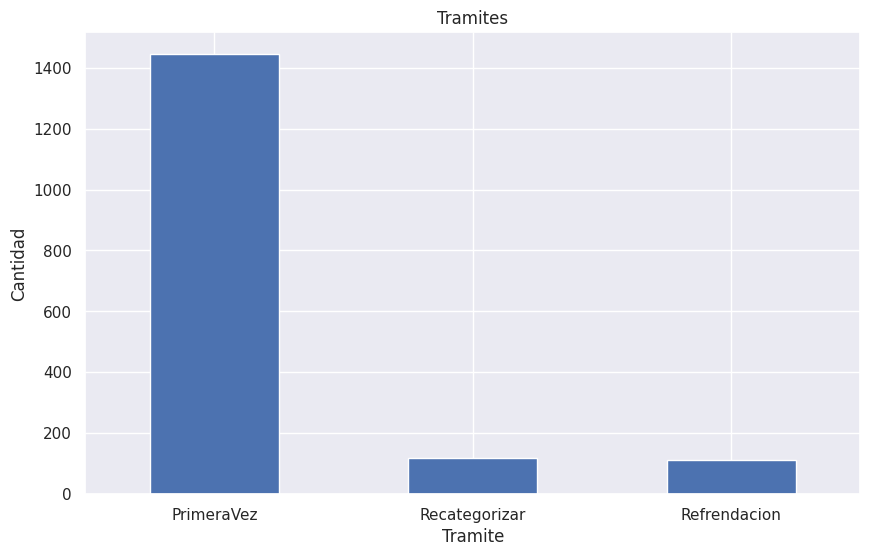

In [29]:
tramitesdf.Tramite.value_counts().plot(kind="bar")
plt.title("Tramites")
plt.xlabel("Tramite")
plt.xticks(rotation=0)
plt.ylabel("Cantidad")
plt.show()

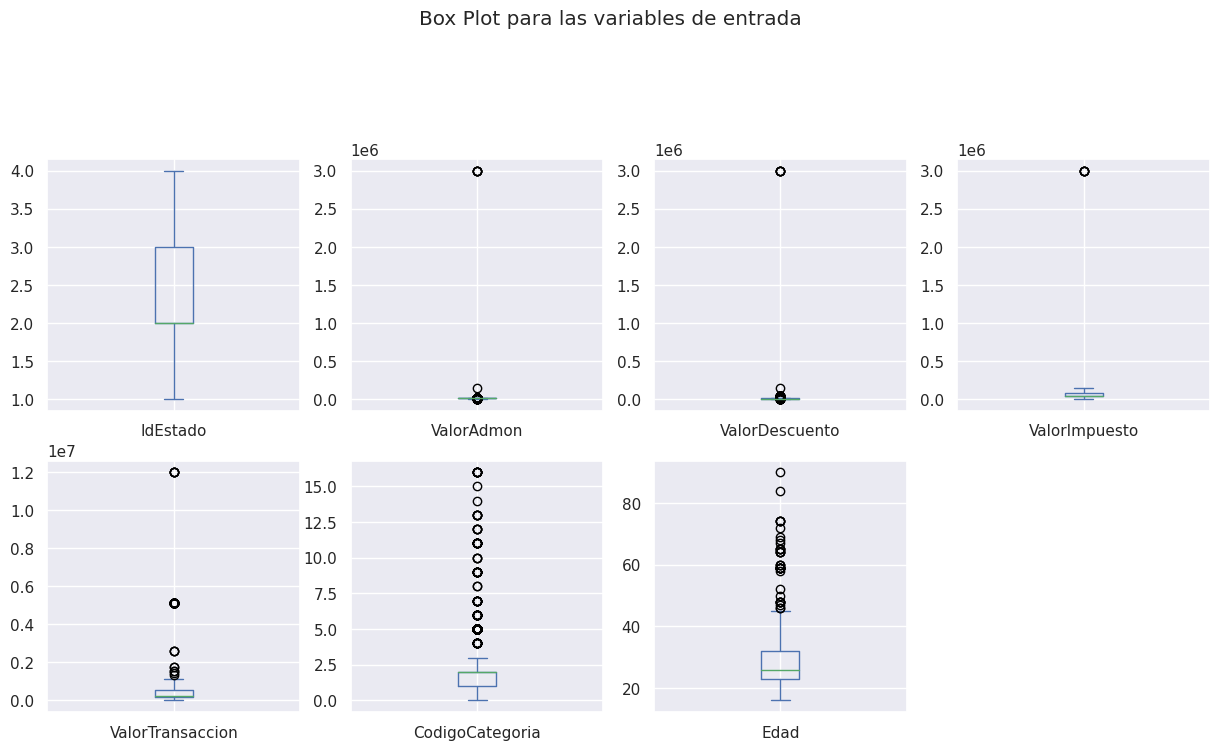

In [30]:
tramitesdf.drop(['Id','IdGenero','IdTramite','Serie'], axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15), title='Box Plot para las variables de entrada')
plt.show()

<Axes: >

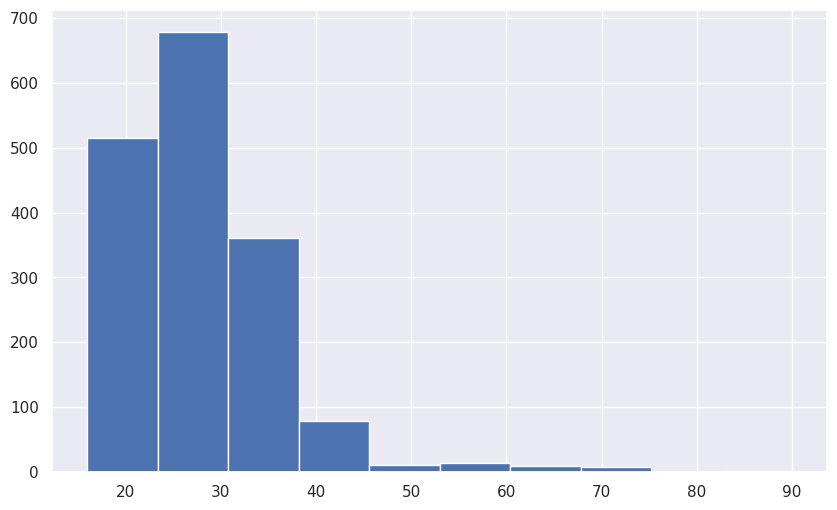

In [31]:
# Histograma del Edad
tramitesdf['Edad'].hist()

In [32]:
# Evaluamos la distribución
# https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm
#Skewness es una medida estadística que describe la asimetría de una distribución de probabilidad. Indica si la distribución se desvía de la simetría, siendo positiva si la cola está en el lado derecho y negativa si está en el lado izquierdo
#Kurtosis es una medida estadística que describe la forma de las colas de una distribución de probabilidad, indicando si contiene valores extremos o outliers. es mayor a 3, se dice que la distribución es leptocúrtica o con colas más pesadas que una distribución normal indicando si contiene valores extremos o outliers

print(f"Skewness: {tramitesdf['Edad'].skew()}")
print(f"Kurtosis: {tramitesdf['Edad'].kurt()}")

Skewness: 2.2558704685126125
Kurtosis: 8.607693442709884


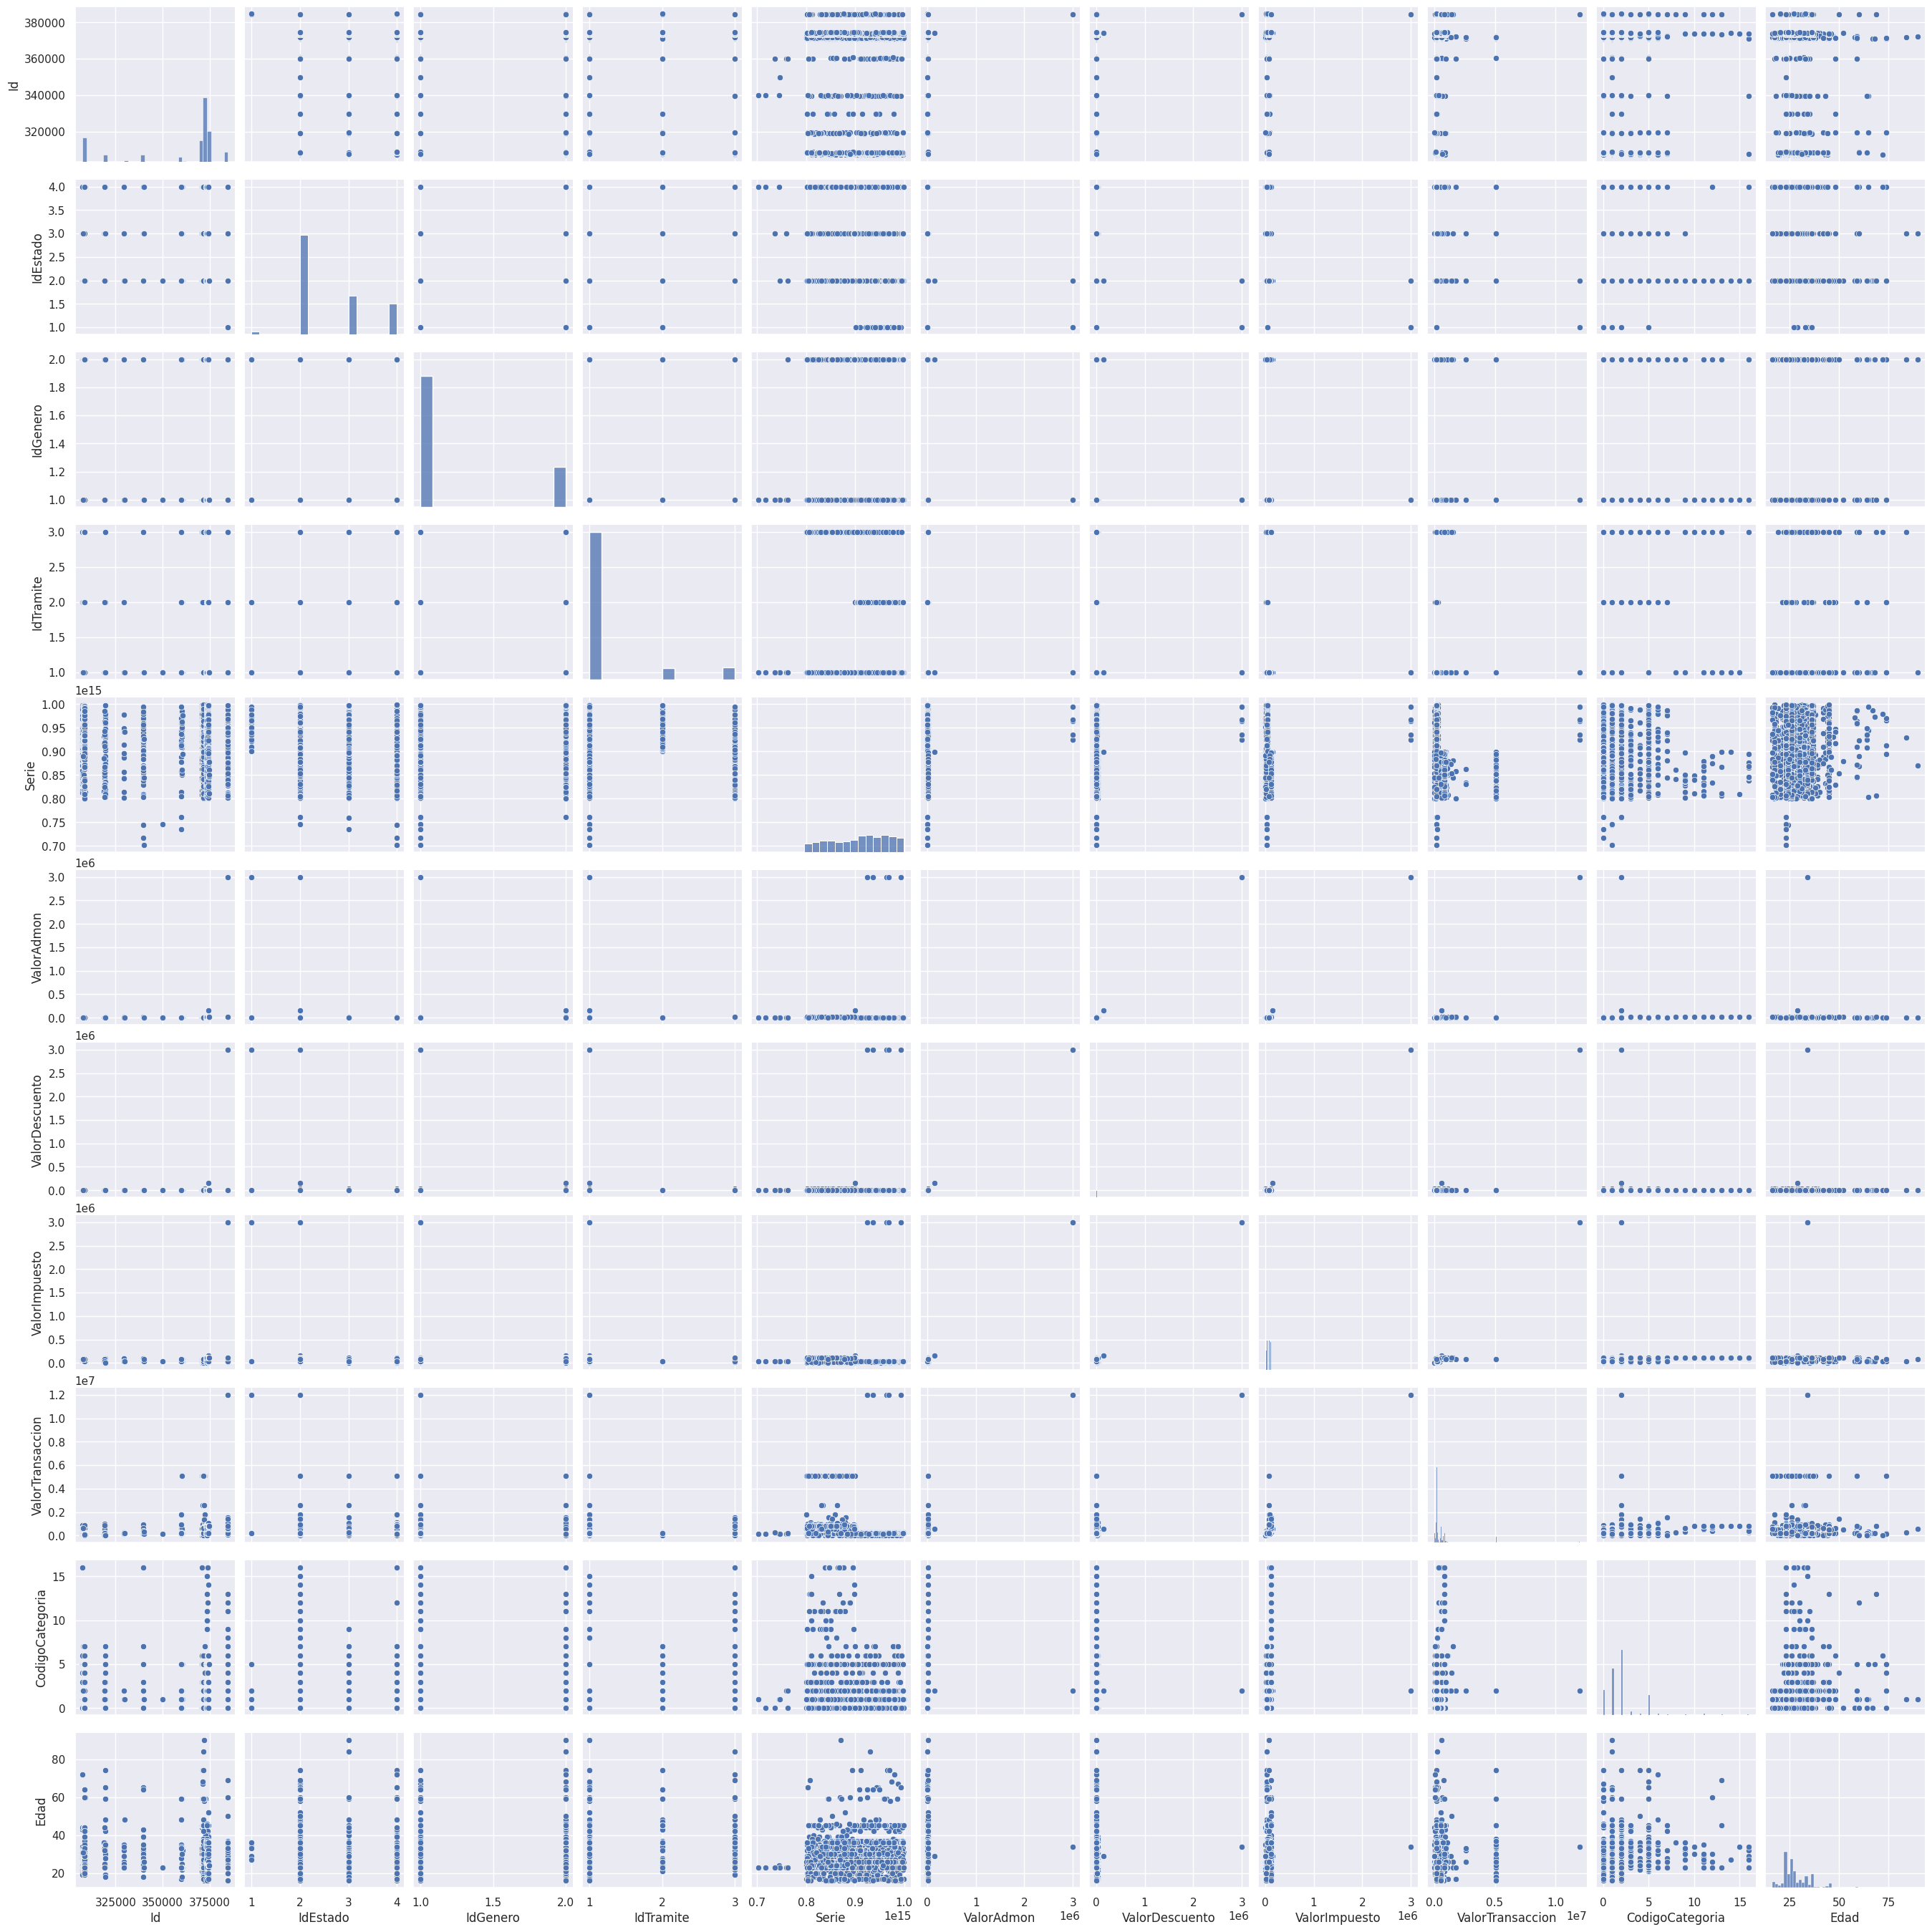

In [33]:
sns.pairplot(tramitesdf)

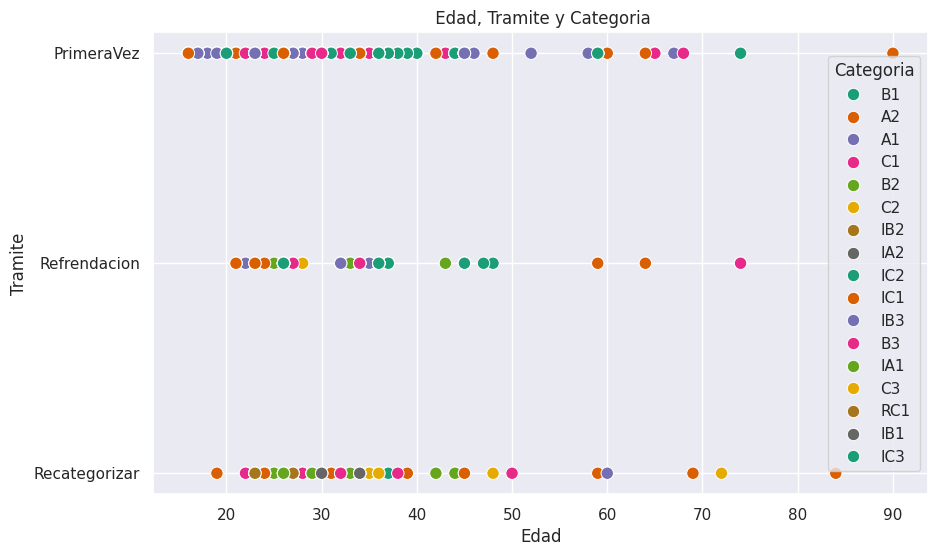

In [34]:
# Relación entre Edad, Tramite y Categoria
# Esta grafica nos permite ver que relaciones existen y como podemos analizarlo

sns.scatterplot(x="Edad", y="Tramite", hue="Categoria", data=tramitesdf, palette="Dark2", s=80)
plt.title(" Edad, Tramite y Categoria")
plt.show()

In [35]:
# Revisamos porcentajes
tramitesdf['IdGenero'].value_counts("normalize = True")

,proportion
IdGenero,
1,0.765373
2,0.234627


## Correlación entre variables



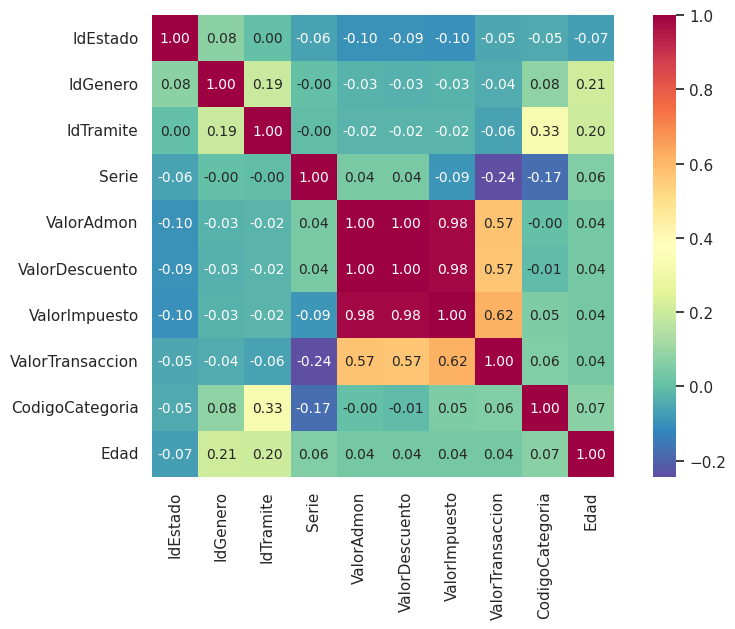

In [36]:
# Correlacion entre variables
numeric_df = tramitesdf.select_dtypes(include=['number']).drop(['Id'], axis=1)
corrmat = numeric_df.corr()

hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=numeric_df.columns,
                 xticklabels=numeric_df.columns,
                 cmap="Spectral_r")
plt.show()

#Las variables con mayor correlación positiva son:
 1. Edad y IdGenero con un valor de 0.21
 2. Edad y IdTramite con un valor de 0.20
 3. CodigoCategoria y IdTramite con un valor de 0.33


## Analsis de Correlación:

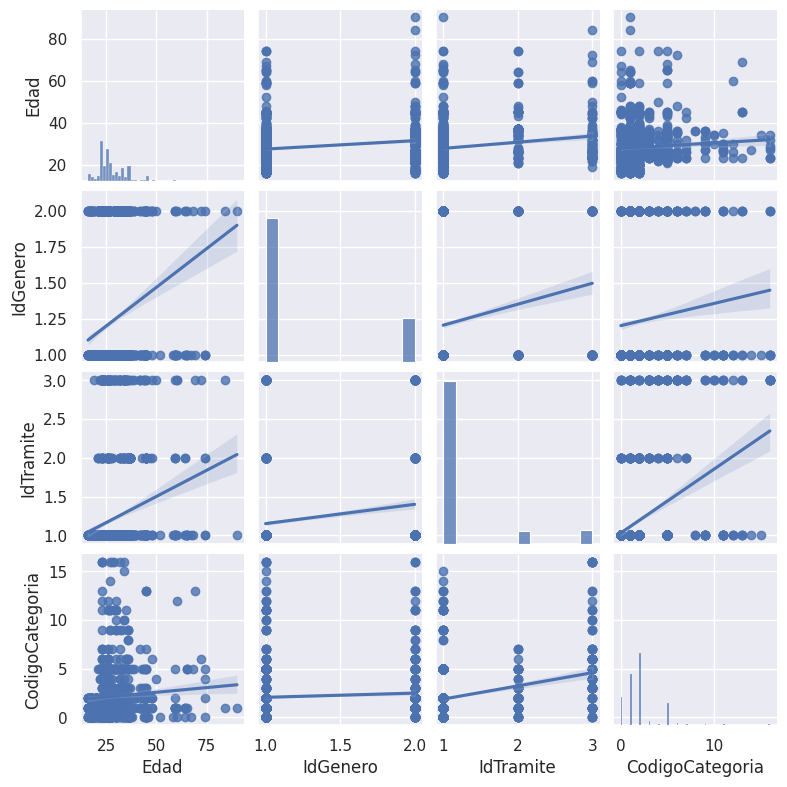

In [37]:
# Gráfico de parejas con tipo de trazado de regresión
sns.pairplot(tramitesdf,height=2, vars = ["Edad", "IdGenero", "IdTramite", "CodigoCategoria"],  kind="reg")
plt.show()

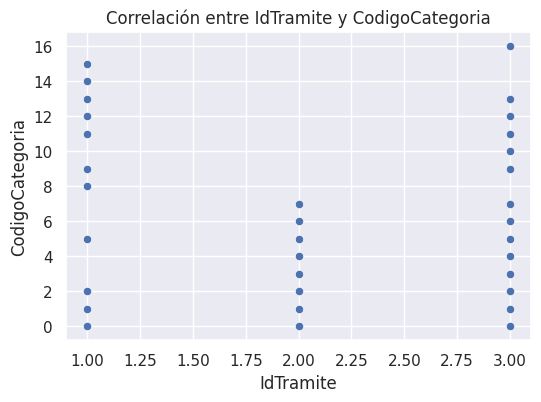

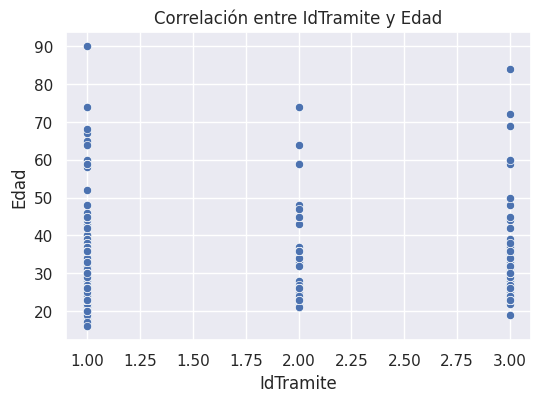

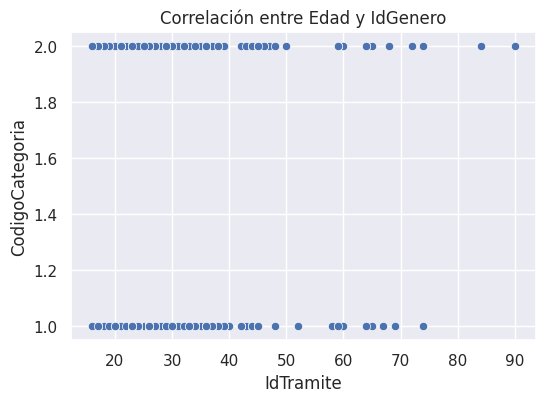

In [38]:
# visualizar la correlacion entre dos variables

# Selecciona las dos variables que deseas analizar
variable1 = 'IdTramite'
variable2 = 'CodigoCategoria'

# Selecciona las dos variables que deseas analizar
variable3 = 'IdTramite'
variable4 = 'Edad'

# Selecciona las dos variables que deseas analizar
variable5 = 'Edad'
variable6 = 'IdGenero'

# Crea un scatter plot para visualizar la correlación
plt.figure(figsize=(6, 4))
sns.scatterplot(x=variable1, y=variable2, data=tramitesdf)
plt.title(f'Correlación entre {variable1} y {variable2}')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Crea un scatter plot para visualizar la correlación
plt.figure(figsize=(6, 4))
sns.scatterplot(x=variable3, y=variable4, data=tramitesdf)
plt.title(f'Correlación entre {variable3} y {variable4}')
plt.xlabel(variable3)
plt.ylabel(variable4)
plt.show()

# Crea un scatter plot para visualizar la correlación
plt.figure(figsize=(6, 4))
sns.scatterplot(x=variable5, y=variable6, data=tramitesdf)
plt.title(f'Correlación entre {variable5} y {variable6}')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

## Analisis de Correlación: Pearson




In [39]:
#"IdTramite", "CodigoCategoria"
from scipy import stats

corr = stats.pearsonr(tramitesdf["IdTramite"], tramitesdf["CodigoCategoria"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 6.669857740042983e-45
cor:		 0.33388799094233135


In [40]:
#"IdTramite", "Edad"
from scipy import stats

corr = stats.pearsonr(tramitesdf["IdTramite"], tramitesdf["Edad"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 1.7064616544916537e-16
cor:		 0.19948374432899232


In [41]:
#"Edad", "IdGenero"
from scipy import stats

corr = stats.pearsonr(tramitesdf["Edad"], tramitesdf["IdGenero"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 9.010676038923026e-18
cor:		 0.20765190145879395


In [42]:
numeric_df = tramitesdf.select_dtypes(include=['number']).drop(['Id','Serie'], axis=1)
correlationPearson = numeric_df.corr(method='pearson')
correlationPearson

,IdEstado,IdGenero,IdTramite,ValorAdmon,ValorDescuento,ValorImpuesto,ValorTransaccion,CodigoCategoria,Edad
IdEstado,1.000000,0.075219,0.000953,-0.096394,-0.093703,-0.099909,-0.052581,-0.045474,-0.073247
IdGenero,0.075219,1.000000,0.190278,-0.029129,-0.030804,-0.027851,-0.042704,0.081628,0.207652
IdTramite,0.000953,0.190278,1.000000,-0.020806,-0.021764,-0.023839,-0.061478,0.333888,0.199484
ValorAdmon,-0.096394,-0.029129,-0.020806,1.000000,0.999513,0.982600,0.573713,-0.000262,0.037121
ValorDescuento,-0.093703,-0.030804,-0.021764,0.999513,1.000000,0.981284,0.570982,-0.006985,0.035853
ValorImpuesto,-0.099909,-0.027851,-0.023839,0.982600,0.981284,1.000000,0.618233,0.051512,0.037871
ValorTransaccion,-0.052581,-0.042704,-0.061478,0.573713,0.570982,0.618233,1.000000,0.055121,0.036052
CodigoCategoria,-0.045474,0.081628,0.333888,-0.000262,-0.006985,0.051512,0.055121,1.000000,0.070149
Edad,-0.073247,0.207652,0.199484,0.037121,0.035853,0.037871,0.036052,0.070149,1.000000


Calcula y visualiza la matriz de correlación utilizando un mapa de calor.

<Axes: >

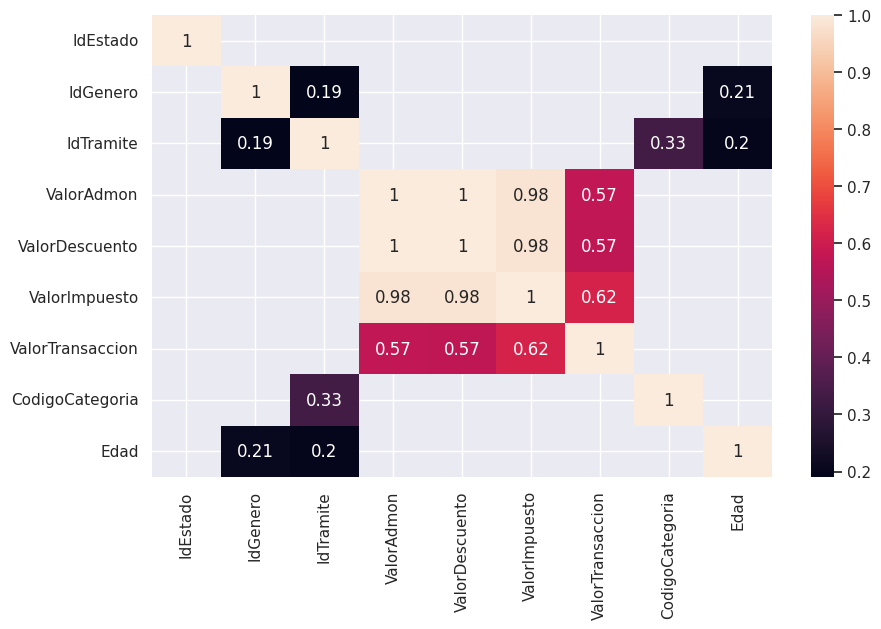

In [43]:
# Filtrar la matriz de correlación para valores mayores a 0.1
correlationPearson_filtered = correlationPearson[
    (correlationPearson > 0.1) | (correlationPearson < -0.1)
]

# Generar el mapa de calor
sns.heatmap(correlationPearson_filtered, xticklabels=correlationPearson_filtered.columns,
            yticklabels=correlationPearson_filtered.columns, annot=True)


In [44]:
# visualizar la correlacion entre dos variables

# Selecciona las dos variables que deseas analizar
variable1 = 'IdTramite'
variable2 = 'CodigoCategoria'

# Selecciona las dos variables que deseas analizar
variable3 = 'IdTramite'
variable4 = 'Edad'

# Selecciona las dos variables que deseas analizar
variable5 = 'Edad'
variable6 = 'IdGenero'


# Calcula el coeficiente de correlación de Pearson
correlationPearsonA = tramitesdf[variable1].corr(tramitesdf[variable2], method='pearson')
print(f'Coeficiente de correlación de Pearson IdTramite-Categoria: {correlationPearsonA}')
correlationPearsonB = tramitesdf[variable3].corr(tramitesdf[variable4], method='pearson')
print(f'Coeficiente de correlación de Pearson IdTramite-Edad: {correlationPearsonB}')
correlationPearsonC = tramitesdf[variable5].corr(tramitesdf[variable6], method='pearson')
print(f'Coeficiente de correlación de Pearson Edad-Genero: {correlationPearsonC}')


Coeficiente de correlación de Pearson IdTramite-Categoria: 0.33388799094233207
Coeficiente de correlación de Pearson IdTramite-Edad: 0.19948374432899205
Coeficiente de correlación de Pearson Edad-Genero: 0.20765190145879373


## Analisis de Correlación: Kendall

In [45]:
# tramitesdf visualizar la correlacion entre dos variables #"IdTramite", "CodigoCategoria"

from scipy import stats

corrKedall = stats.kendalltau(tramitesdf["IdTramite"], tramitesdf["CodigoCategoria"])
print("p-value:\t", corrKedall[1])
print("cor:\t\t", corrKedall[0])

p-value:	 3.267725907210588e-27
cor:		 0.23592911064032307


In [46]:
from scipy import stats

corrKedall = stats.kendalltau(tramitesdf["IdTramite"], tramitesdf["Edad"])
print("p-value:\t", corrKedall[1])
print("cor:\t\t", corrKedall[0])

p-value:	 1.2747605741953545e-18
cor:		 0.18011417281089356


In [47]:
from scipy import stats

corrKedall = stats.kendalltau(tramitesdf["Edad"], tramitesdf["IdGenero"])
print("p-value:\t", corrKedall[1])
print("cor:\t\t", corrKedall[0])

p-value:	 6.417172581483389e-19
cor:		 0.1847655373841512


In [48]:
numeric_df = tramitesdf.select_dtypes(include=['number']).drop(['Id','Serie'], axis=1)
correlationKendall = numeric_df.corr(method='kendall')
correlationKendall

,IdEstado,IdGenero,IdTramite,ValorAdmon,ValorDescuento,ValorImpuesto,ValorTransaccion,CodigoCategoria,Edad
IdEstado,1.000000,0.076761,-0.016151,-0.089984,-0.130356,-0.074404,-0.098511,-0.010262,-0.091101
IdGenero,0.076761,1.000000,0.211894,0.012788,-0.036774,0.014693,0.001667,0.061183,0.184766
IdTramite,-0.016151,0.211894,1.000000,-0.063823,0.024048,-0.061970,-0.009913,0.235929,0.180114
ValorAdmon,-0.089984,0.012788,-0.063823,1.000000,0.361573,0.891733,0.658806,0.126549,0.018947
ValorDescuento,-0.130356,-0.036774,0.024048,0.361573,1.000000,0.267011,0.368745,-0.029062,0.123612
ValorImpuesto,-0.074404,0.014693,-0.061970,0.891733,0.267011,1.000000,0.640158,0.102092,0.057630
ValorTransaccion,-0.098511,0.001667,-0.009913,0.658806,0.368745,0.640158,1.000000,0.089850,0.068456
CodigoCategoria,-0.010262,0.061183,0.235929,0.126549,-0.029062,0.102092,0.089850,1.000000,0.058312
Edad,-0.091101,0.184766,0.180114,0.018947,0.123612,0.057630,0.068456,0.058312,1.000000


<Axes: >

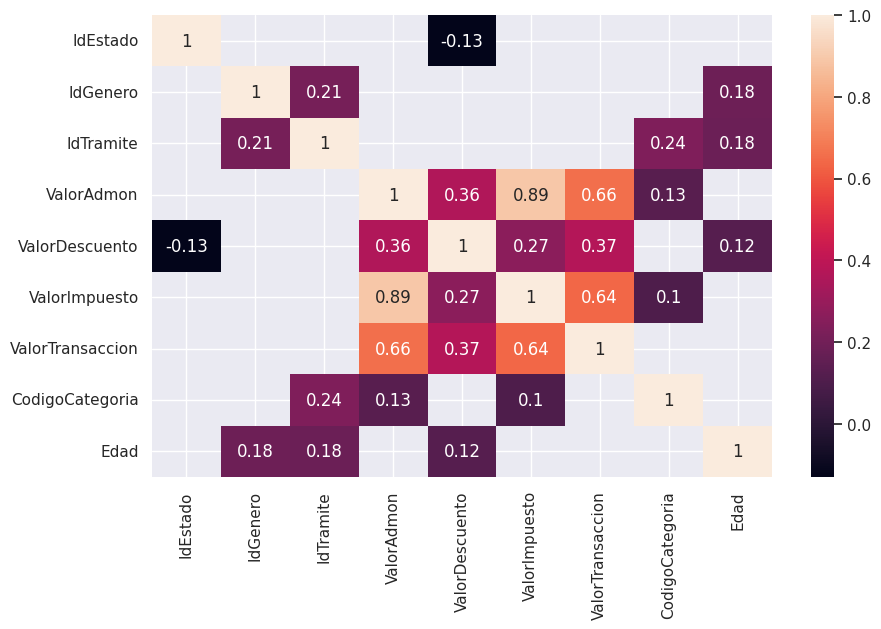

In [49]:
# Filtrar la matriz de correlación para valores mayores a 0.1
correlationKendall_filtered = correlationKendall[
    (correlationKendall > 0.1) | (correlationKendall < -0.1)
]

# Generar el mapa de calor
sns.heatmap(correlationKendall_filtered, xticklabels=correlationKendall_filtered.columns,
            yticklabels=correlationKendall_filtered.columns, annot=True)



In [50]:
# tramitesdf visualizar la correlacion entre dos variables #"IdTramite", "CodigoCategoria"
# Selecciona las dos variables que deseas analizar
variable1 = 'IdTramite'
variable2 = 'CodigoCategoria'

# Selecciona las dos variables que deseas analizar
variable3 = 'IdTramite'
variable4 = 'Edad'

# Selecciona las dos variables que deseas analizar
variable5 = 'Edad'
variable6 = 'IdGenero'

# Calcula el coeficiente de correlación de Kendall
correlationKendallA = tramitesdf[variable1].corr(tramitesdf[variable2], method='kendall')
print(f'Coeficiente de correlación de Kendall: {correlationKendallA}')
correlationKendallB = tramitesdf[variable3].corr(tramitesdf[variable4], method='kendall')
print(f'Coeficiente de correlación de Pearson IdTramite-Edad: {correlationKendallB}')
correlationKendallC = tramitesdf[variable5].corr(tramitesdf[variable6], method='kendall')
print(f'Coeficiente de correlación de Pearson Edad-Genero: {correlationKendallC}')

Coeficiente de correlación de Kendall: 0.23592911064032307
Coeficiente de correlación de Pearson IdTramite-Edad: 0.18011417281089356
Coeficiente de correlación de Pearson Edad-Genero: 0.1847655373841512


## Analisis de Correlación: Spearman

In [51]:
# tramitesdf visualizar la correlacion entre dos variables #"IdTramite", "CodigoCategoria"
from scipy import stats

corrSpearman = stats.spearmanr(tramitesdf["IdTramite"], tramitesdf["CodigoCategoria"])
print("p-value:\t", corrSpearman[1])
print("cor:\t\t", corrSpearman[0])

p-value:	 1.677122730883042e-27
cor:		 0.2610715866004386


In [52]:
corrSpearman = stats.spearmanr(tramitesdf["IdTramite"], tramitesdf["Edad"])
print("p-value:\t", corrSpearman[1])
print("cor:\t\t", corrSpearman[0])

p-value:	 3.787725592848561e-19
cor:		 0.2160868523729196


In [53]:
corrSpearman = stats.spearmanr(tramitesdf["Edad"], tramitesdf["IdGenero"])
print("p-value:\t", corrSpearman[1])
print("cor:\t\t", corrSpearman[0])

p-value:	 2.5168127648085186e-19
cor:		 0.21714928876497797


In [54]:
numeric_df = tramitesdf.select_dtypes(include=['number']).drop(['Id','Serie'], axis=1)
correlationSpearman = numeric_df.corr(method='spearman')
correlationSpearman

,IdEstado,IdGenero,IdTramite,ValorAdmon,ValorDescuento,ValorImpuesto,ValorTransaccion,CodigoCategoria,Edad
IdEstado,1.000000,0.080662,-0.017152,-0.106008,-0.161100,-0.088353,-0.121777,-0.011443,-0.111892
IdGenero,0.080662,1.000000,0.215492,0.014515,-0.043789,0.016694,0.002019,0.067340,0.217149
IdTramite,-0.017152,0.215492,1.000000,-0.072851,0.027268,-0.070197,-0.013714,0.261072,0.216087
ValorAdmon,-0.106008,0.014515,-0.072851,1.000000,0.425128,0.917149,0.784486,0.157398,0.025487
ValorDescuento,-0.161100,-0.043789,0.027268,0.425128,1.000000,0.303197,0.432478,-0.036171,0.157185
ValorImpuesto,-0.088353,0.016694,-0.070197,0.917149,0.303197,1.000000,0.768889,0.129471,0.077367
ValorTransaccion,-0.121777,0.002019,-0.013714,0.784486,0.432478,0.768889,1.000000,0.131593,0.093986
CodigoCategoria,-0.011443,0.067340,0.261072,0.157398,-0.036171,0.129471,0.131593,1.000000,0.075029
Edad,-0.111892,0.217149,0.216087,0.025487,0.157185,0.077367,0.093986,0.075029,1.000000


<Axes: >

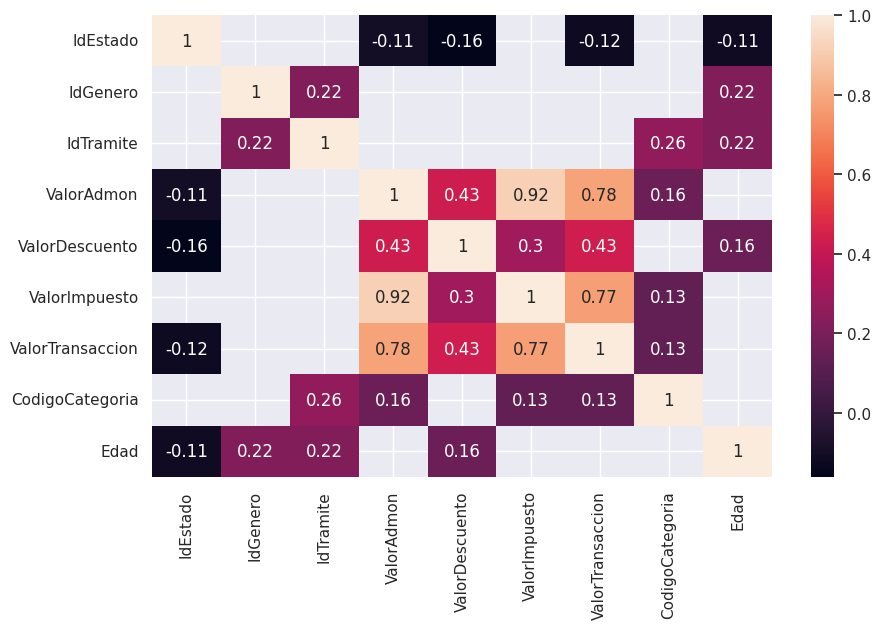

In [55]:
# Filtrar la matriz de correlación para valores mayores a 0.1
correlationSpearman_filtered = correlationSpearman[
    (correlationSpearman > 0.1) | (correlationSpearman < -0.1)
]

# Generar el mapa de calor
sns.heatmap(correlationSpearman_filtered, xticklabels=correlationSpearman_filtered.columns,
            yticklabels=correlationSpearman_filtered.columns, annot=True)

#sns.heatmap(correlationSpearman,xticklabels=correlationSpearman.columns,  yticklabels=correlationSpearman.columns)

In [56]:
# tramitesdf visualizar la correlacion entre dos variables #"IdTramite", "CodigoCategoria"
# prompt: visualizar la correlacion entre dos variables

# Selecciona las dos variables que deseas analizar
variable1 = 'IdTramite'
variable2 = 'CodigoCategoria'

# Selecciona las dos variables que deseas analizar
variable3 = 'IdTramite'
variable4 = 'Edad'

# Selecciona las dos variables que deseas analizar
variable5 = 'Edad'
variable6 = 'IdGenero'


# Calcula el coeficiente de correlación de Spearman
correlationSpearmanA = tramitesdf[variable1].corr(tramitesdf[variable2], method='spearman')
print(f'Coeficiente de correlación de Spearman: {correlationSpearmanA}')
correlationSpearmanB = tramitesdf[variable3].corr(tramitesdf[variable4], method='spearman')
print(f'Coeficiente de correlación de Spearman: {correlationSpearmanB}')
correlationSpearmanC = tramitesdf[variable5].corr(tramitesdf[variable6], method='spearman')
print(f'Coeficiente de correlación de Spearman: {correlationSpearmanC}')




Coeficiente de correlación de Spearman: 0.2610715866004386
Coeficiente de correlación de Spearman: 0.2160868523729196
Coeficiente de correlación de Spearman: 0.21714928876497797


##Modelado

In [57]:
#Escojamos nuestras variables predictoras
predictores = ['IdTramite','Edad','IdGenero']
#Escojamos que es lo que queremos encontrar
objetivo= 'Categoria'

#Recordemos que en nuestra variable Y va lo que queremos encontrar/predecir.
#Mientras en la vairable X van las variables que usaremos para encontrar a Y
y= tramitesdf[objetivo].values
X= tramitesdf[predictores].values

Partición de los datos

In [58]:
from sklearn.model_selection import train_test_split
# Crear conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1340, 3)
(335, 3)
(1340,)
(335,)


##Modelo LogisticRegression
#####Entrenar un modelo de clasificación (usando LogisticRegression como ejemplo)
######Crear un modelo de clasificación de LogisticRegression

In [59]:
import warnings
warnings.filterwarnings('ignore')


In [60]:
# Se importa el modelo
from sklearn.linear_model import LogisticRegression

#Se crea el modelo
modeloLogReg = LogisticRegression(multi_class='multinomial')

#se entrena el modelo
modeloLogReg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

###Evaluación del modelo

In [61]:
modeloLogReg.score(X_test, y_test)

0.40298507462686567

In [62]:
y_pred_lr = modeloLogReg.predict(X_test)
# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred_lr)
print(f"\nPrecisión del modelo: {precision:.2f}")
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_lr))


Precisión del modelo: 0.40

Informe de Clasificación:
              precision    recall  f1-score   support

          A1       0.00      0.00      0.00        54
          A2       0.37      0.16      0.22        81
          B1       0.42      0.91      0.57       132
          B2       0.18      0.40      0.25         5
          B3       0.00      0.00      0.00         3
          C1       0.00      0.00      0.00        48
          C2       0.00      0.00      0.00         3
          C3       0.00      0.00      0.00         2
         IB1       0.00      0.00      0.00         1
         IB2       0.00      0.00      0.00         2
         IB3       0.00      0.00      0.00         2
         RC1       0.00      0.00      0.00         2

    accuracy                           0.40       335
   macro avg       0.08      0.12      0.09       335
weighted avg       0.26      0.40      0.28       335



<Axes: >

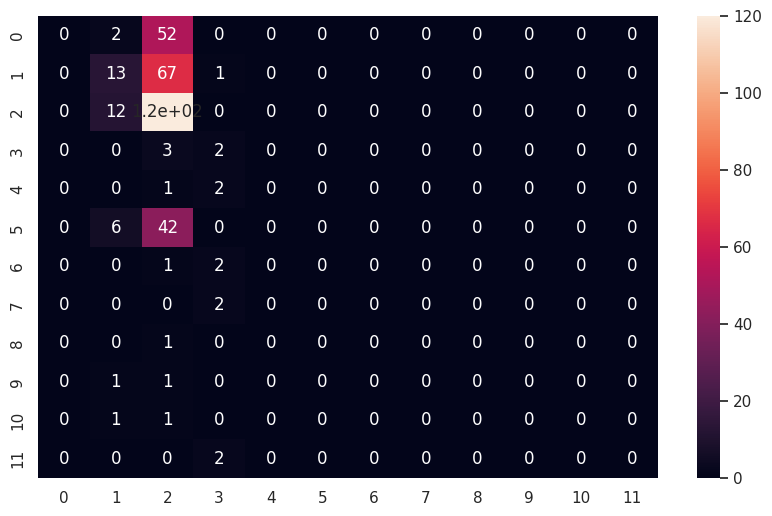

In [63]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True)

In [64]:
parameters = {
    'multi_class' : ['multinomial'],
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [65]:
modeloLogReg = LogisticRegression()
modeloLogReg_gs = GridSearchCV(modeloLogReg,
                   param_grid = parameters,
                   scoring='accuracy',
                   cv=7)


In [66]:
modeloLogReg_gs.fit(X_train,y_train)

GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'multi_class': ['multinomial'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [67]:
modeloLogReg_gs.best_score_

0.40296995761655446

##Modelo RandomForestClassifier
#####Entrenar un modelo de clasificación (usando RandomForestClassifier como ejemplo)
######Crear un modelo de clasificación de RandomForestClassifier

In [68]:
# Crear un modelo de clasificación de bosque aleatorio
modeloRanClass = RandomForestClassifier(random_state=42)
modeloRanClass.fit(X_train, y_train)


RandomForestClassifier(random_state=42)


Precisión del modelo: 0.45


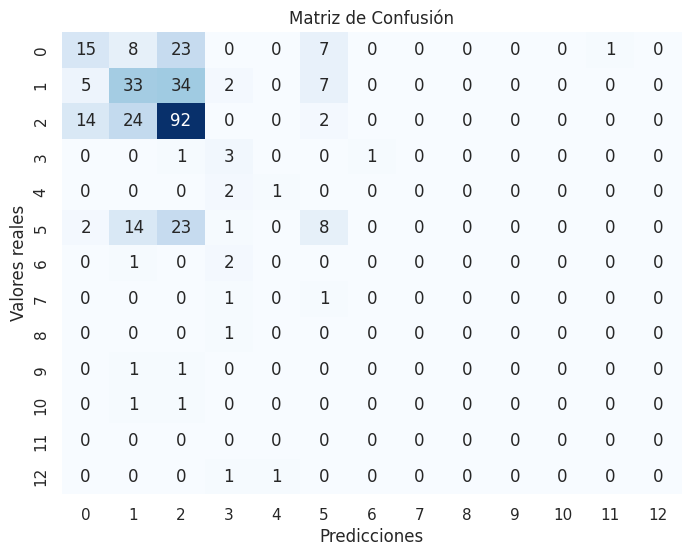


Informe de Clasificación:
              precision    recall  f1-score   support

          A1       0.42      0.28      0.33        54
          A2       0.40      0.41      0.40        81
          B1       0.53      0.70      0.60       132
          B2       0.23      0.60      0.33         5
          B3       0.50      0.33      0.40         3
          C1       0.32      0.17      0.22        48
          C2       0.00      0.00      0.00         3
          C3       0.00      0.00      0.00         2
         IB1       0.00      0.00      0.00         1
         IB2       0.00      0.00      0.00         2
         IB3       0.00      0.00      0.00         2
         IC1       0.00      0.00      0.00         0
         RC1       0.00      0.00      0.00         2

    accuracy                           0.45       335
   macro avg       0.18      0.19      0.18       335
weighted avg       0.43      0.45      0.43       335



In [70]:
#Evaluación del modelo
y_pred = modeloRanClass.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")

# Mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(informe_clasificacion)

In [71]:
# Guardar el modelo en un archivo usando pickle
import pickle

with open('modelo_tramites.pkl', 'wb') as archivo_salida:
    pickle.dump(modeloRanClass, archivo_salida)


In [78]:
with open('modelo_tramites.pkl', 'rb') as archivo_entrada:
    modeloTramites = pickle.load(archivo_entrada)

# Crear un nuevo ejemplo de datos
nuevoTramite = pd.DataFrame({
    ' IdTramite': [3],
    ' Edad': [40],
    ' IdGenero': [1]
})

# Hacer una predicción usando el modelo cargado
prediccion = modeloTramites.predict(nuevoTramite)
print("\nPredicción:", prediccion)


Predicción: ['B2']


# Conclusiones

Se realizó un análisis expliratorio de datos sobre un conjunto de datos de trámites. Las etapas incluyeron la limpieza de datos, se abordaron los valores faltantes utilizando estrategias de imputación, mientras que las transformaciones de datos aseguraron la coherencia y la interpretabilidad, la corrección de formatos y el análisis de correlación entre variables. Se identificaron y trataron valores perdidos, se ajustó el formato de la fecha de nacimiento para calcular la edad y se exploraron las relaciones entre las variables mediante gráficos y medidas de correlación como Pearson, Kendall y Spearman. Finalmente, se entrenaron modelos de clasificación (LogisticRegression y RandomForestClassifier) para predecir la categoría de los trámites.

Los análisis de correlación, revelaron que la edad tiene una correlación positiva débil con el IdTramite y el IdGenero, Existe una correlación moderada positiva entre IdTramite y CodigoCategoria, lo que permitió orientar el análisis.

El coeficiente de correlación de Pearson
Edad y IdGenero con un valor de 0.21
Edad y IdTramite con un valor de 0.20
CodigoCategoria y IdTramite con un valor de 0.33

Por otra parte el se concluye que al usar el modelo LogisticRegression no muestra una precisión aceptable para predecir la categoría de los trámites, la matriz de confusión revela que el modelo tiene mayor dificultad para predecir ciertas categorías. Dado lo anterior se decide modelo usar el modelo RandomForestClassifier el cual muestra un aumento en la precisión y la matriz de confusión revela que el modelo tambien presenta difucultad de predicción pero en menor grado que el LogisticRegression.
    
Este análisis proporciona una base para el desarrollo de modelos predictivos para predecir la Categoria en función de sus características Edad, IdGenero y IdTramite.
